In [ ]:
install.packages("ROSE")
library(ROSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded ROSE 0.0-4




In [ ]:
setwd("/content")
data <- read.csv(file = "healthcare-dataset-stroke-data.csv", header = TRUE)

bmi <- data$bmi
glucose <- data$avg_glucose_level
y <- data$stroke


print("hello")

bmi_mean <- mean(data$bmi, na.rm=TRUE)
bmi_mean

omitted_data = na.omit(data)

head(omitted_data)

[1] "hello"


[1] 28.89324

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
7,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [ ]:
summary(omitted_data)

       id           gender               age         hypertension    
 Min.   :   77   Length:4909        Min.   : 0.08   Min.   :0.00000  
 1st Qu.:18605   Class :character   1st Qu.:25.00   1st Qu.:0.00000  
 Median :37608   Mode  :character   Median :44.00   Median :0.00000  
 Mean   :37064                      Mean   :42.87   Mean   :0.09187  
 3rd Qu.:55220                      3rd Qu.:60.00   3rd Qu.:0.00000  
 Max.   :72940                      Max.   :82.00   Max.   :1.00000  
 heart_disease    ever_married        work_type         Residence_type    
 Min.   :0.0000   Length:4909        Length:4909        Length:4909       
 1st Qu.:0.0000   Class :character   Class :character   Class :character  
 Median :0.0000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.0495                                                           
 3rd Qu.:0.0000                                                           
 Max.   :1.0000                                             

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,2.77741545,0.98124492,formerly smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,0.01384039,0.45922236,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,1.48398039,0.70113526,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,1.54903481,-0.62301952,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,1.82118292,0.01359335,formerly smoked,1
7,53882,Male,74,1,1,Yes,Private,Rural,-0.79269943,-0.19012277,never smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,9046,1,67,0,1,1,1,1,2.77741545,0.98124492,2,1
3,31112,1,80,0,1,1,1,0,0.01384039,0.45922236,0,1
4,60182,0,49,0,0,1,1,1,1.48398039,0.70113526,1,1
5,1665,0,79,1,0,1,3,0,1.54903481,-0.62301952,0,1
6,56669,1,81,0,0,1,1,1,1.82118292,0.01359335,2,1
7,53882,1,74,1,1,1,1,0,-0.79269943,-0.19012277,0,1


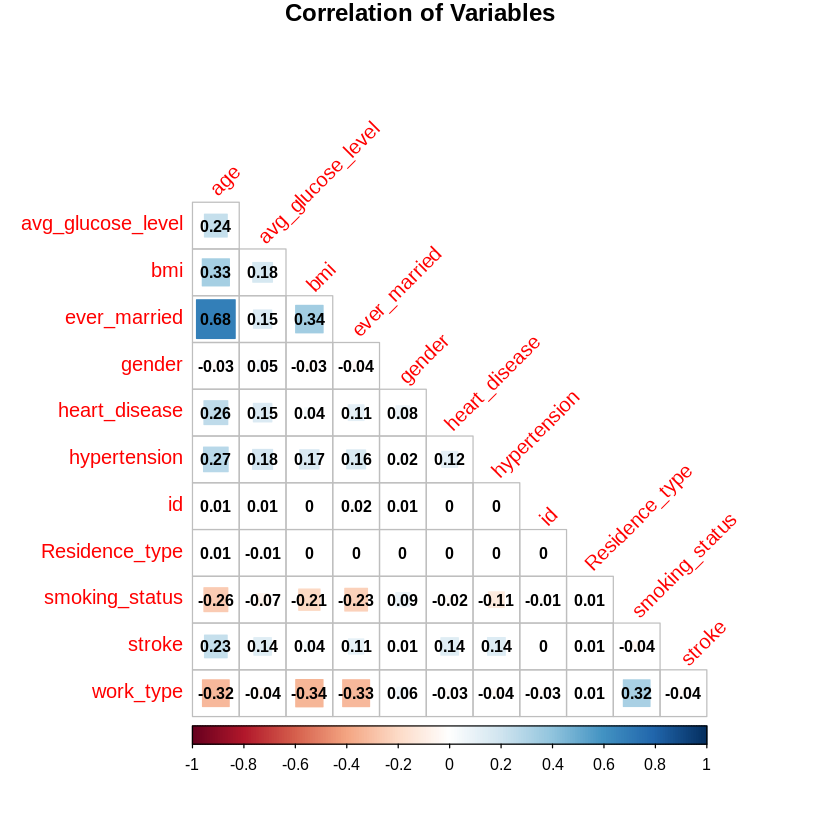

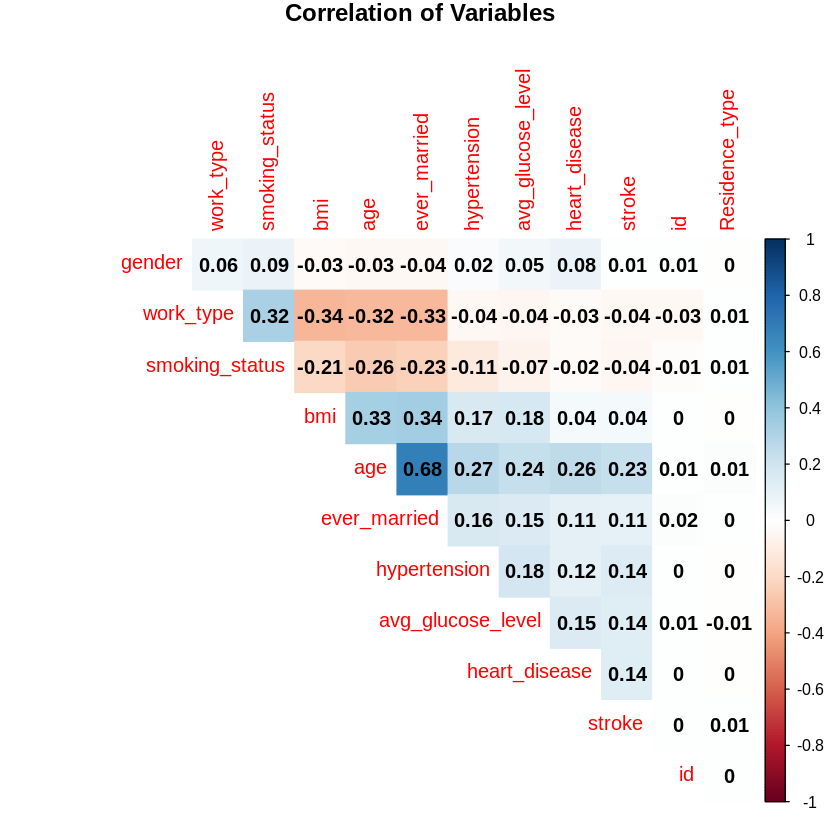

In [ ]:
### Correlation Table ###
#install.packages("corrplot")
library(corrplot)

mydata.cor = cor(data_norm)

title = "Correlation of Variables"

# Option 1
corrplot(mydata.cor, method = 'square', type = 'lower', insig='blank',
         addCoef.col ='black', number.cex = 0.8, order = 'alphabet', tl.srt = 45,
         diag = FALSE, title = title, mar = c(0,0,1,0))

#Option 2
corrplot(mydata.cor, method = "color", diag = FALSE, type = "upper", 
         order = "hclust", title = title, addCoef.col = "black", sig.level = 0.05,
         insig = "blank", mar = c(0,0,1,0))

In [ ]:
#install.packages('corrgram')
#library(corrgram)

#corrgram(data_norm,
#         order = TRUE,              
#         upper.panel = panel.pie,   
#         lower.panel = panel.shade, 
#         text.panel = panel.txt,    
#         main = "Correlogram")      

In [ ]:
biserial.cor(omitted_data$hypertension, omitted_data$stroke)

[1] -0.1425146

In [ ]:
## contingency table for stroke vs hypertension
hypertension <- omitted_data$hypertension
stroke <- omitted_data$stroke
(cont_table_hyp <- table(hypertension,stroke))

prop.table(cont_table_hyp,1)
chisq.test(cont_table_hyp,correct = FALSE)

## contingency table for stroke vs heart disease
heart_disease <- omitted_data$heart_disease
(cont_table_hd <- table(heart_disease,stroke))

prop.table(cont_table_hd,1)
chisq.test(cont_table_hd,correct = FALSE)

## contingency table for stroke vs smoking status
smoking <- omitted_data$smoking_status
(cont_table_smoke <- table(smoking,stroke))

prop.table(cont_table_smoke,1)
chisq.test(cont_table_smoke,correct = FALSE)
## smoking is definitely an indicator, but we need to probably test each category individually 

            stroke
hypertension    0    1
           0 4309  149
           1  391   60

            stroke
hypertension          0          1
           0 0.96657694 0.03342306
           1 0.86696231 0.13303769


	Pearson's Chi-squared test

data:  cont_table_hyp
X-squared = 99.704, df = 1, p-value < 2.2e-16


             stroke
heart_disease    0    1
            0 4497  169
            1  203   40

             stroke
heart_disease          0          1
            0 0.96378054 0.03621946
            1 0.83539095 0.16460905


	Pearson's Chi-squared test

data:  cont_table_hd
X-squared = 93.403, df = 1, p-value < 2.2e-16


                 stroke
smoking              0    1
  formerly smoked  780   57
  never smoked    1768   84
  smokes           698   39
  Unknown         1454   29

                 stroke
smoking                    0          1
  formerly smoked 0.93189964 0.06810036
  never smoked    0.95464363 0.04535637
  smokes          0.94708277 0.05291723
  Unknown         0.98044504 0.01955496


	Pearson's Chi-squared test

data:  cont_table_smoke
X-squared = 34.943, df = 3, p-value = 1.252e-07


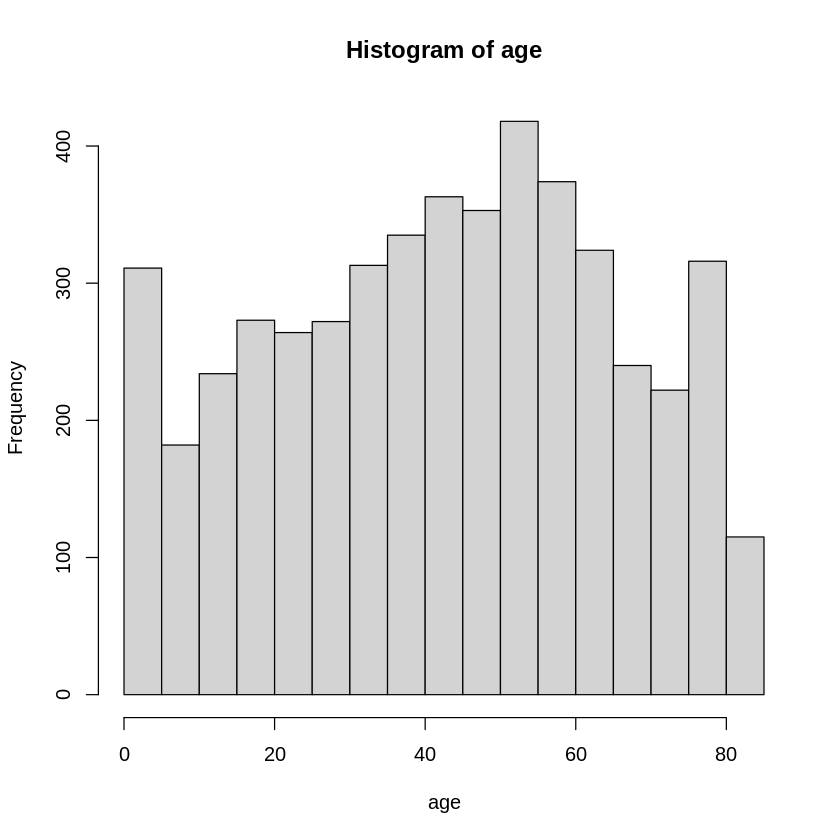

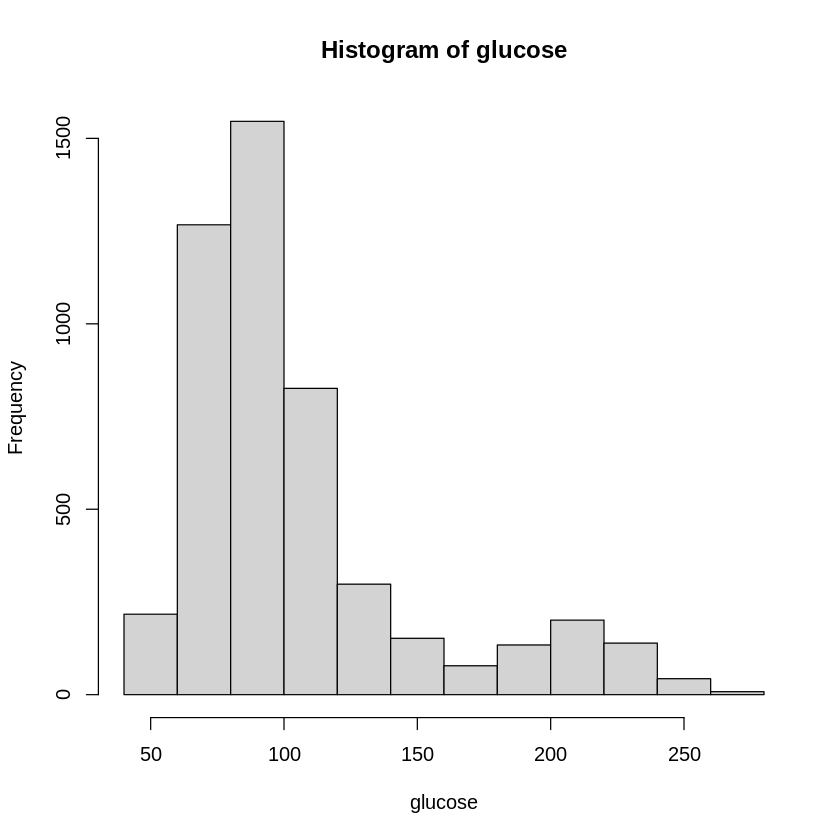

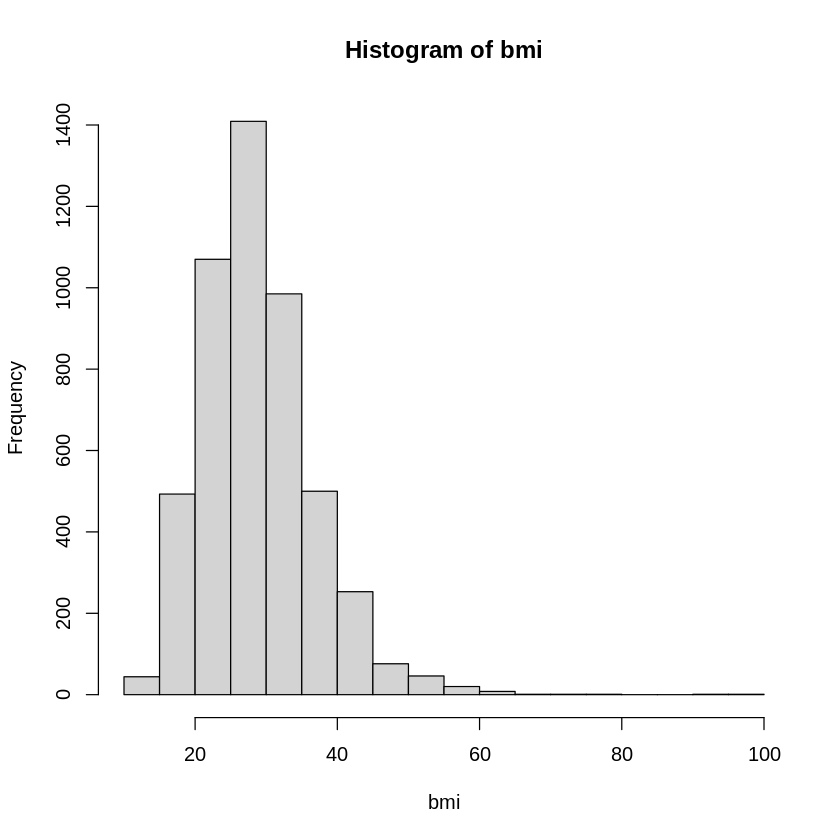

In [ ]:
# Get the distribution of the numerical variables to determine if we need to use a t-test (normally distributed) or other tests (non-normally distributed)
age <- omitted_data$age
glucose <- omitted_data$avg_glucose_level
bmi <- omitted_data$bmi



hist(age)
hist(glucose)
hist(bmi)

In [ ]:
# Since they are not normally distributed, we will use the wilcoxon signed-rank test
stroke = omitted_data[omitted_data$stroke == 1, ]
nonstroke = omitted_data[omitted_data$stroke == 0, ]

wilcox.test(x=stroke$age, y=nonstroke$age, paired=FALSE, alternative = "two.sided")
wilcox.test(x=stroke$avg_glucose_level, y=nonstroke$avg_glucose_level, paired=FALSE, alternative = "two.sided")
wilcox.test(x=stroke$bmi, y=nonstroke$bmi, paired=FALSE, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  stroke$age and nonstroke$age
W = 821280, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  stroke$avg_glucose_level and nonstroke$avg_glucose_level
W = 614278, p-value = 8.168e-10
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  stroke$bmi and nonstroke$bmi
W = 569022, p-value = 0.0001026
alternative hypothesis: true location shift is not equal to 0


In [ ]:
### Normalizing numeric columns ### --- should the Age column be normalized???
data_norm <- data.frame(omitted_data)
data_norm$avg_glucose_level = (data_norm$avg_glucose_level-mean(data_norm$avg_glucose_level))/sd(data_norm$avg_glucose_level)
data_norm$bmi = (data_norm$bmi-mean(data_norm$bmi))/sd(data_norm$bmi)
data_norm$age = (data_norm$age-mean(data_norm$age))/sd(data_norm$age)
#data_norm$id = (data_norm$id-mean(data_norm$id))/sd(data_norm$id)

head(data_norm)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,9046,Male,1.0700290,0,1,Yes,Private,Urban,2.77741545,0.98124492,formerly smoked,1
3,31112,Male,1.6463949,0,1,Yes,Private,Rural,0.01384039,0.45922236,never smoked,1
4,60182,Female,0.2719838,0,0,Yes,Private,Urban,1.48398039,0.70113526,smokes,1
5,1665,Female,1.6020591,1,0,Yes,Self-employed,Rural,1.54903481,-0.62301952,never smoked,1
6,56669,Male,1.6907307,0,0,Yes,Private,Urban,1.82118292,0.01359335,formerly smoked,1
7,53882,Male,1.3803799,1,1,Yes,Private,Rural,-0.79269943,-0.19012277,never smoked,1


,age,avg_glucose_level,bmi
,<dbl>,<dbl>,<dbl>
1,1.0700290,2.77741545,0.98124492
3,1.6463949,0.01384039,0.45922236
4,0.2719838,1.48398039,0.70113526
5,1.6020591,1.54903481,-0.62301952
6,1.6907307,1.82118292,0.01359335
7,1.3803799,-0.79269943,-0.19012277


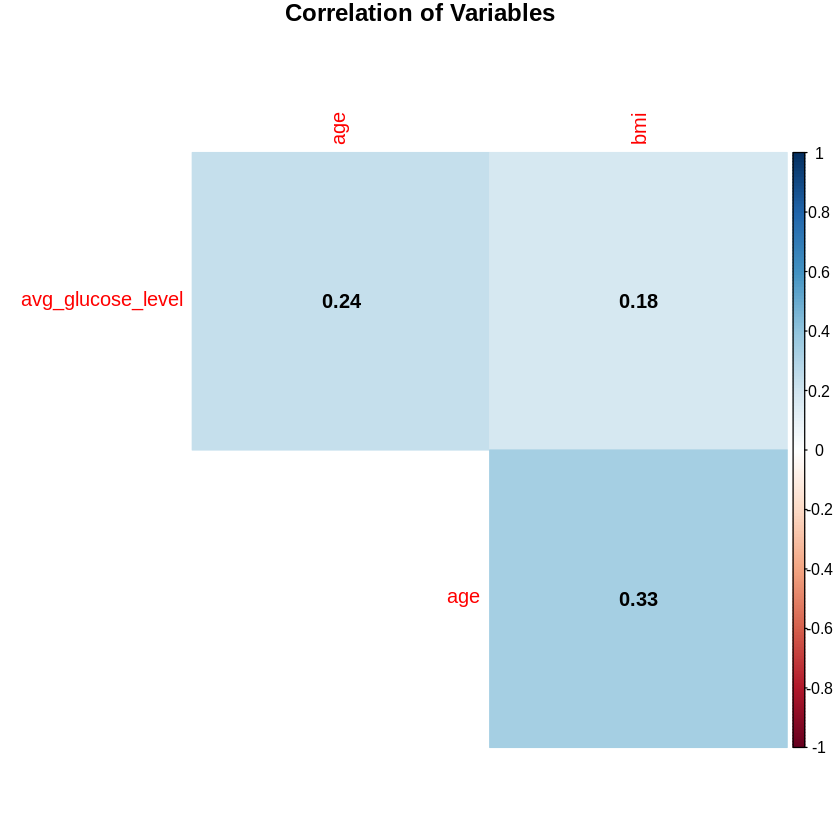

In [ ]:
### Correlation Table ###
datacorr <- subset(data_norm, select=c("age", "avg_glucose_level", "bmi"))
head(datacorr)

#install.packages("corrplot")
library(corrplot)

mydata.cor = cor(datacorr)

title = "Correlation of Variables"

corrplot(mydata.cor, method = "color", diag = FALSE, type = "upper", 
         order = "hclust", title = title, addCoef.col = "black", sig.level = 0.05,
         insig = "blank", mar = c(0,0,1,0))

In [ ]:
# ### Categorical Dummy Variable ###

# # For the gender column 'Male' = 1, 'Female' = 0
# data_norm$gender <- ifelse(data_norm$gender == "Male", 1, 0)

# # For the ever_married column 'Yes' = 1, 'No' = 0
# data_norm$ever_married <- ifelse(data_norm$ever_married == "Yes", 1, 0)

# # For the work_type column 'Private' = 1, 'Govt_job' = 2, 'Self-employed' = 3, 
# # 'children' = 4, 'Never_worked' = 0
# data_norm$work_type <- ifelse(data_norm$work_type == "Private", 1, 
#                         ifelse(data_norm$work_type == "Govt_job", 2, 
#                         ifelse(data_norm$work_type == "Self-employed", 3, 
#                         ifelse(data_norm$work_type == "children", 4, 0))))

# # For the ever_married column 'Urban' = 1, 'Rural' = 0
# data_norm$Residence_type <- ifelse(data_norm$Residence_type == "Urban", 1, 0)

# # For the work_type column 'smokes' = 1, 'formerly smoked' = 2, 'Unknown' = 3, 
# # 'never smoked' = 0
# data_norm$smoking_status <- ifelse(data_norm$smoking_status == "smokes", 1, 
#                         ifelse(data_norm$smoking_status == "formerly smoked", 2, 
#                         ifelse(data_norm$smoking_status == "Unknown", 3, 0)))

# head(data_norm)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,9046,1,1.0700290,0,1,1,1,1,2.77741545,0.98124492,2,1
3,31112,1,1.6463949,0,1,1,1,0,0.01384039,0.45922236,0,1
4,60182,0,0.2719838,0,0,1,1,1,1.48398039,0.70113526,1,1
5,1665,0,1.6020591,1,0,1,3,0,1.54903481,-0.62301952,0,1
6,56669,1,1.6907307,0,0,1,1,1,1.82118292,0.01359335,2,1
7,53882,1,1.3803799,1,1,1,1,0,-0.79269943,-0.19012277,0,1


In [ ]:
# Gender
male = ifelse(data_norm$gender == 'Male', 1, 0)
female = ifelse(data_norm$gender == 'Female', 1, 0)

# Smoking Status
smokes = ifelse(data_norm$smoking_status == 'smokes', 1, 0)
never_smoked = ifelse(data_norm$smoking_status == 'never smoked', 1, 0)
formerly_smoked = ifelse(data_norm$smoking_status == 'formerly_smoked', 1, 0)
unknown_smoker = ifelse(data_norm$smoking_status == 'Unknown', 1, 0)

# Married
married <- ifelse(data_norm$ever_married == "Yes", 1, 0)
unmarried = ifelse(data_norm$ever_married == "No", 1, 0)

# Work Type
private = ifelse(data_norm$work_type == "Private", 1, 0)
govt = ifelse(data_norm$work_type == "Govt_job", 1, 0)
self = ifelse(data_norm$work_type == "Self-employed", 1, 0)
children = ifelse(data_norm$work_type == "children", 1, 0)
never_worked = ifelse(data_norm$work_type == "Never_worked", 1, 0)


# For the ever_married column 'Urban' = 1, 'Rural' = 0
urban = ifelse(data_norm$Residence_type == "Urban", 1, 0)
rural = ifelse(data_norm$Residence_type == "Rural", 1, 0)

In [ ]:
reg_df = data.frame(male=male,
                    female=female,
                    age=data_norm$age, 
                    hypertension=data_norm$hypertension,
                    heart_disease = data_norm$heart_disease, 
                    married=married,
                    unmarried=unmarried,
                    private=private,
                    govt = govt,
                    self=self,
                    children=children,
                    never_worked=never_worked,
                    urban=urban,
                    rural=rural,
                    glucose=data_norm$avg_glucose_level,
                    bmi=data_norm$bmi,
                    smokes=smokes,
                    never_smoked=never_smoked,
                    formerly_smoked=formerly_smoked,
                    unknown_smoker=unknown_smoker,
                    stroke=data_norm$stroke)


In [ ]:
head(reg_df)

,male,female,age,hypertension,heart_disease,married,unmarried,private,govt,self,⋯,never_worked,urban,rural,glucose,bmi,smokes,never_smoked,formerly_smoked,unknown_smoker,stroke
,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,1.0700290,0,1,1,0,1,0,0,⋯,0,1,0,2.77741545,0.98124492,0,0,0,0,1
2,1,0,1.6463949,0,1,1,0,1,0,0,⋯,0,0,1,0.01384039,0.45922236,0,1,0,0,1
3,0,1,0.2719838,0,0,1,0,1,0,0,⋯,0,1,0,1.48398039,0.70113526,1,0,0,0,1
4,0,1,1.6020591,1,0,1,0,0,0,1,⋯,0,0,1,1.54903481,-0.62301952,0,1,0,0,1
5,1,0,1.6907307,0,0,1,0,1,0,0,⋯,0,1,0,1.82118292,0.01359335,0,0,0,0,1
6,1,0,1.3803799,1,1,1,0,1,0,0,⋯,0,0,1,-0.79269943,-0.19012277,0,1,0,0,1


In [ ]:
##binary
reg_df$hypertension <- factor(reg_df$hypertension)
reg_df$heart_disease <- factor(reg_df$heart_disease)
reg_df$male <- factor(reg_df$male)
reg_df$female <- factor(reg_df$female)
reg_df$married <- factor(reg_df$married)
reg_df$unmarried <- factor(reg_df$unmarried)
reg_df$private <- factor(reg_df$private)
reg_df$govt <- factor(reg_df$govt)
reg_df$self <- factor(reg_df$self)
reg_df$children <- factor(reg_df$children)
reg_df$never_worked <- factor(reg_df$never_worked)
reg_df$urban <- factor(reg_df$urban)
reg_df$rural <- factor(reg_df$rural)
reg_df$smokes <- factor(reg_df$smokes)
reg_df$never_smoked <- factor(reg_df$never_smoked)
reg_df$formerly_smoked <- factor(reg_df$formerly_smoked)
reg_df$unkown_smoker <- factor(reg_df$unknown_smoker)
reg_df$stroke <- factor(reg_df$stroke)

In [ ]:
set.seed(123)
smp_size <- floor(0.75 * nrow(reg_df))
train_ind <- sample(seq_len(nrow(reg_df)), size = smp_size)

train <- reg_df[train_ind, ]
x_train = subset(train, select = -c(stroke))
y_train = train$stroke

test <- reg_df[-train_ind, ]

In [ ]:
#male+female+married+unmarried+private+govt+self+children+never_worked+urban+rural++never_smoked+formerly_smoked+unknown_smoker
lr = glm(stroke ~ age+hypertension+heart_disease+glucose+bmi+smokes, data = train, family = "binomial")

In [ ]:
result <- predict(lr, newdata=test)

In [ ]:
# table for predictions
stroke.pred = rep("0", dim(test)[1])
stroke.pred[result > .5] = 1
table(stroke.pred, test$stroke)
#plot(lr$fitted.values)

           
stroke.pred    0    1
          0 1175   53

In [ ]:
# Attempting Oversampling to rebalance the dataset
train_balanced = ROSE(stroke~age+hypertension+heart_disease+glucose+bmi+smokes, data = train, seed=1)$data

In [ ]:
lr_balanced = glm(stroke~., data=train_balanced, family = "binomial")

In [ ]:
balanced_result = predict(lr_balanced, test)

In [ ]:
# table for predictions
stroke.pred = rep("0", dim(test)[1])
stroke.pred[balanced_result > .5] = 1
table(stroke.pred, test$stroke)
#plot(lr$fitted.values)

           
stroke.pred   0   1
          0 994  16
          1 181  37

In [ ]:
accuracy.meas(test$stroke, balanced_result)


Call: 
accuracy.meas(response = test$stroke, predicted = balanced_result)

Examples are labelled as positive when predicted is greater than 0.5 

precision: 0.170
recall: 0.698
F: 0.137

In [ ]:
# Interpretation of above: Low precision means we have a high False positive rate (which is ok for stroke screening). 
# Recall of .7 means we have a low False negative rate, which is what we're aiming for.
# Low F-score means the overall accuracy of this model is weak

In [ ]:
lr_reduced = glm(stroke ~ hypertension + glucose, data = train, family = "binomial")

In [ ]:
result_reduced <- predict(lr_reduced, test, type = "response")

           
stroke.pred    0    1
          0 1175   53

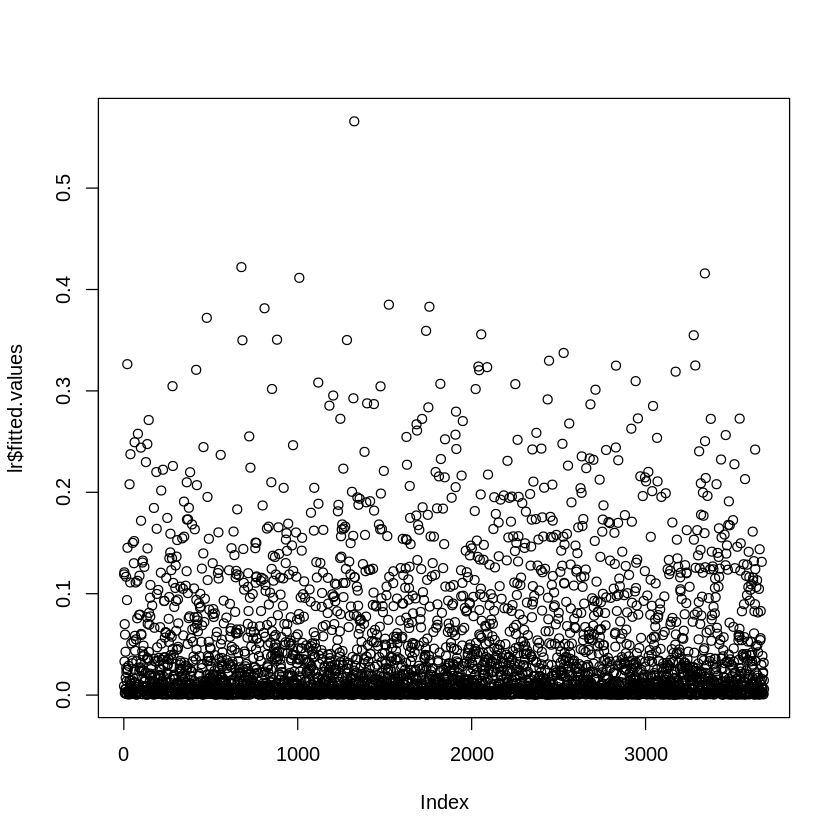

In [ ]:
# table for predictions
stroke.pred = rep("0", dim(test)[1])
stroke.pred[result_reduced > .5] = 1
table(stroke.pred, test$stroke)
plot(lr$fitted.values)